In [10]:
import pandas as pd

removed_columns = ['date','view', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','waterfront']
df = pd.read_csv('data/kc_house_data.csv').drop(removed_columns, axis = 'columns')

In [11]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3842
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.0+ MB


In [13]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

### Transforming Data

DONT DO THIS
Condition and Grade will need to be transformed into number values

In [35]:
#replacing all letters with a space and turning into them into integers
df['grade'] = df['grade'].str.replace(r"\D", '').astype(int)
df['grade']

AttributeError: Can only use .str accessor with string values!

In [36]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [37]:
#transforming 'condition' into a 1-5 scale
condition_name = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
condition_value =  ['1', '2', '3', '4', '5']

df['condition'] = df['condition'].replace(condition_name, condition_value).astype(int)


In [38]:
y = df['price']
X = df.drop('price', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
#turning all into log
df_log = np.log(df)

#normalize function
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

C:\Users\dtong\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [40]:
y_log = df_log_norm['price']
X_log = df_log_norm.drop('price', axis=1)

NameError: name 'df_log_norm' is not defined

In [60]:
#Train Test for log

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, random_state=42)

NameError: name 'X_log' is not defined

In [61]:
assert X_train.shape[0] == y_train.shape[0]

NameError: name 'y_log_train' is not defined

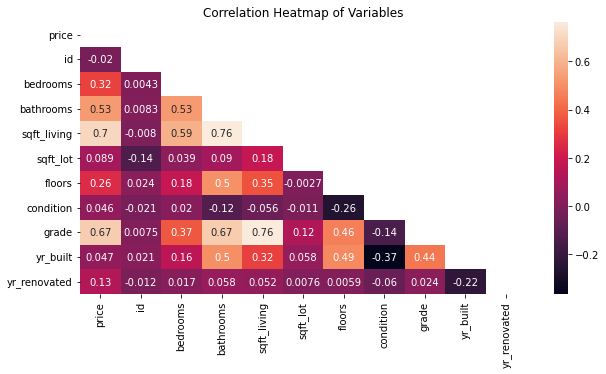

In [62]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#heatmap to show multicollinearity
heatmap_df = pd.concat([y_train, X_train], axis=1)
corr = heatmap_df.corr()

fig, ax = plt.subplots(figsize = (10,5))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr,dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correlation Heatmap of Variables');

log_heatmap_df = pd.concat([y_log_train, X_log_train], axis=1)
corr = log_heatmap_df.corr()

fig, ax = plt.subplots(figsize = (10,5))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr,dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correlation Heatmap of Log Variables');

### Correlation Between Variabales
Solid correlation with bathrooms, sqft_living, and grade of a house in price of house.Surprisingly, there does not seem to be a strong correlation with condition and price.

Strong correlation between sqft_living and bathrooms. Also, grade with bathrooms and sqft_living.

IndexError: index 2 is out of bounds for axis 0 with size 2

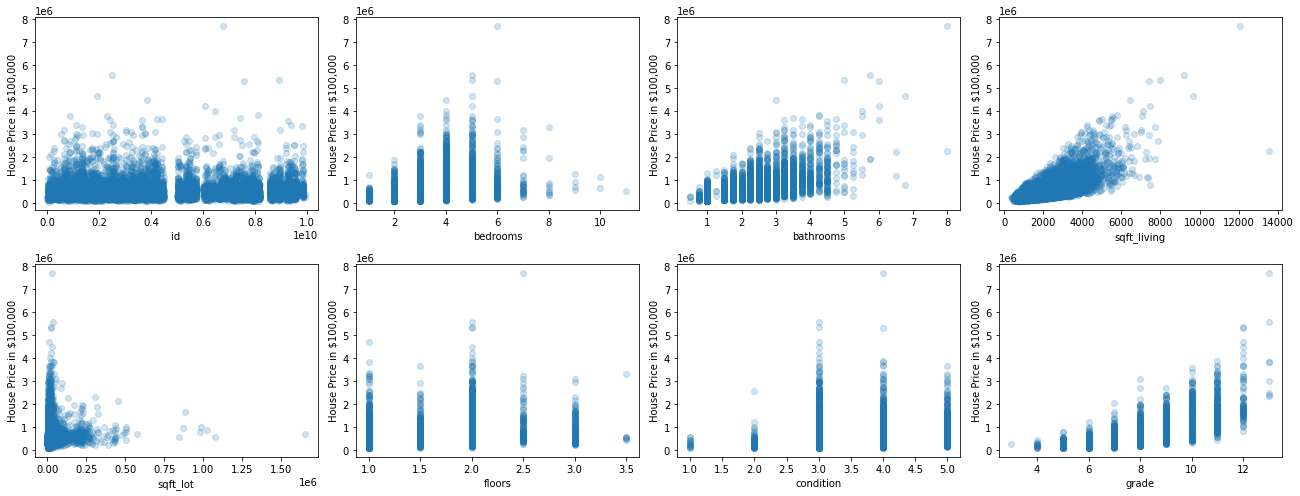

In [44]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18,7))
fig.set_tight_layout(True)

for idx, col in enumerate(X_train.columns):
    ax = axes[idx//4][idx%4]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("House Price in $100,000");

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(15,7))
fig.set_tight_layout(True)

for idx, col in enumerate(X_log_train.columns):
    ax = axes[idx//4][idx%4]
    ax.scatter(X_log_train[col], y_log_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Log");

In [ ]:
#sqft_living is most correlated to price so here's a bigger graph

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,4), ncols=3)
fig.set_tight_layout(True)

ax1.scatter(X['sqft_living'], y, alpha=0.3)
ax1.set_xlabel('sqft_living')
ax1.set_ylabel('price in $100,000')
ax1.set_title('house price vs sqft_living')

#bathrooms
ax2.scatter(X['bathrooms'], y, alpha=0.3)
ax2.set_xlabel('number of bathrooms')
ax2.set_ylabel('price in $100,000')
ax2.set_title('house price vs number of bathrooms')

#grade
ax3.scatter(X['grade'], y, alpha=0.3)
ax3.set_xlabel('house grade')
ax3.set_ylabel('price in $100,000')
ax3.set_title('house price vs house grade');



In [45]:
#Linear Regression using the Logs
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
#fit linear regression model
linreg.fit(X_log_train, y_log_train)

NameError: name 'X_log_train' is not defined

In [46]:
#baseline regression model for sqft_living
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size = 0.2, random_state=1)

#cross_validate log values
baseline_scores = cross_validate(
    estimator=linreg,
    X=X_log_train[['sqft_living']],
    y=y_log_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:      ", baseline_scores['train_score'].mean())
print("Validation score: ", baseline_scores['test_score'].mean())

NameError: name 'X_log_train' is not defined

Extrememly similar performance on training and validation subsets. Explains around 45% of variance.

In [47]:
y_log_hat_train = linreg.predict(X_log_train)

y_log_hat_test = linreg.predict(X_log_test)

NameError: name 'X_log_train' is not defined

In [48]:
from sklearn.metrics import mean_squared_error

#Calculating MSE on test set
test_mse = mean_squared_error(y_log_test, y_log_hat_test)
print("Test MSE: ", test_mse)


NameError: name 'y_log_test' is not defined

In [49]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score

#MSE Scores for 5-Fold Cross-Validation
cv_5_results = -cross_val_score(linreg, X_log, y_log, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validated Test MSEs: ", cv_5_results)
print("Average Test MSE Score:    ",cv_5_results.mean())

NameError: name 'X_log' is not defined

In [50]:
X_train_second_model = X_log_train.drop(['yr_built','condition'], axis=1).copy()
#dropping a few categories with low correlation with price

NameError: name 'X_log_train' is not defined

In [51]:
second_linreg = LinearRegression()

second_linreg_scores = cross_validate(
    estimator=second_linreg,
    X=X_train_second_model,
    y=y_log_train,
    return_train_score=True,
    cv=splitter
)


print("Second Model")
print("Train score:      ", second_linreg_scores['train_score'].mean())
print("Validation score: ", second_linreg_scores['test_score'].mean())
print()
print()
print("Baseline Model")
print("Train score:      ", baseline_scores['train_score'].mean())
print("Validation score: ", baseline_scores['test_score'].mean())

NameError: name 'X_train_second_model' is not defined

The model is a bit improved but

In [52]:
#cross_validate
model_scores = cross_validate(
    estimator=linreg,
    X=X_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:      ", model_scores['train_score'].mean())
print("Validation score: ", model_scores['test_score'].mean())

Train score:       0.4868011739196986
Validation score:  0.5041607862315338


In [53]:
model_2 = X_train.drop(['yr_built','condition'], axis=1).copy()

In [54]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=model_2,
    y=y_train,
    return_train_score=True,
    cv=splitter
)


print("Second Model")
print("Train score:      ", second_model_scores['train_score'].mean())
print("Validation score: ", second_model_scores['test_score'].mean())
print()
print()
print("Baseline Model")
print("Train score:      ", model_scores['train_score'].mean())
print("Validation score: ", model_scores['test_score'].mean())

Second Model
Train score:       nan
Validation score:  nan


Baseline Model
Train score:       0.4868011739196986
Validation score:  0.5041607862315338


C:\Users\dtong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dtong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dtong\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\dtong\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dtong\anaconda3\lib\site

In [55]:
#Multicollinearity in log
import statsmodels.api as sm

sm.OLS(y_log_train, sm.add_constant(X_train_second_model)).fit().summary()

NameError: name 'y_log_train' is not defined

In [56]:
sm.OLS(y_train, sm.add_constant(model_2)).fit().summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [58]:
significant_features

third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

NameError: name 'significant_features' is not defined

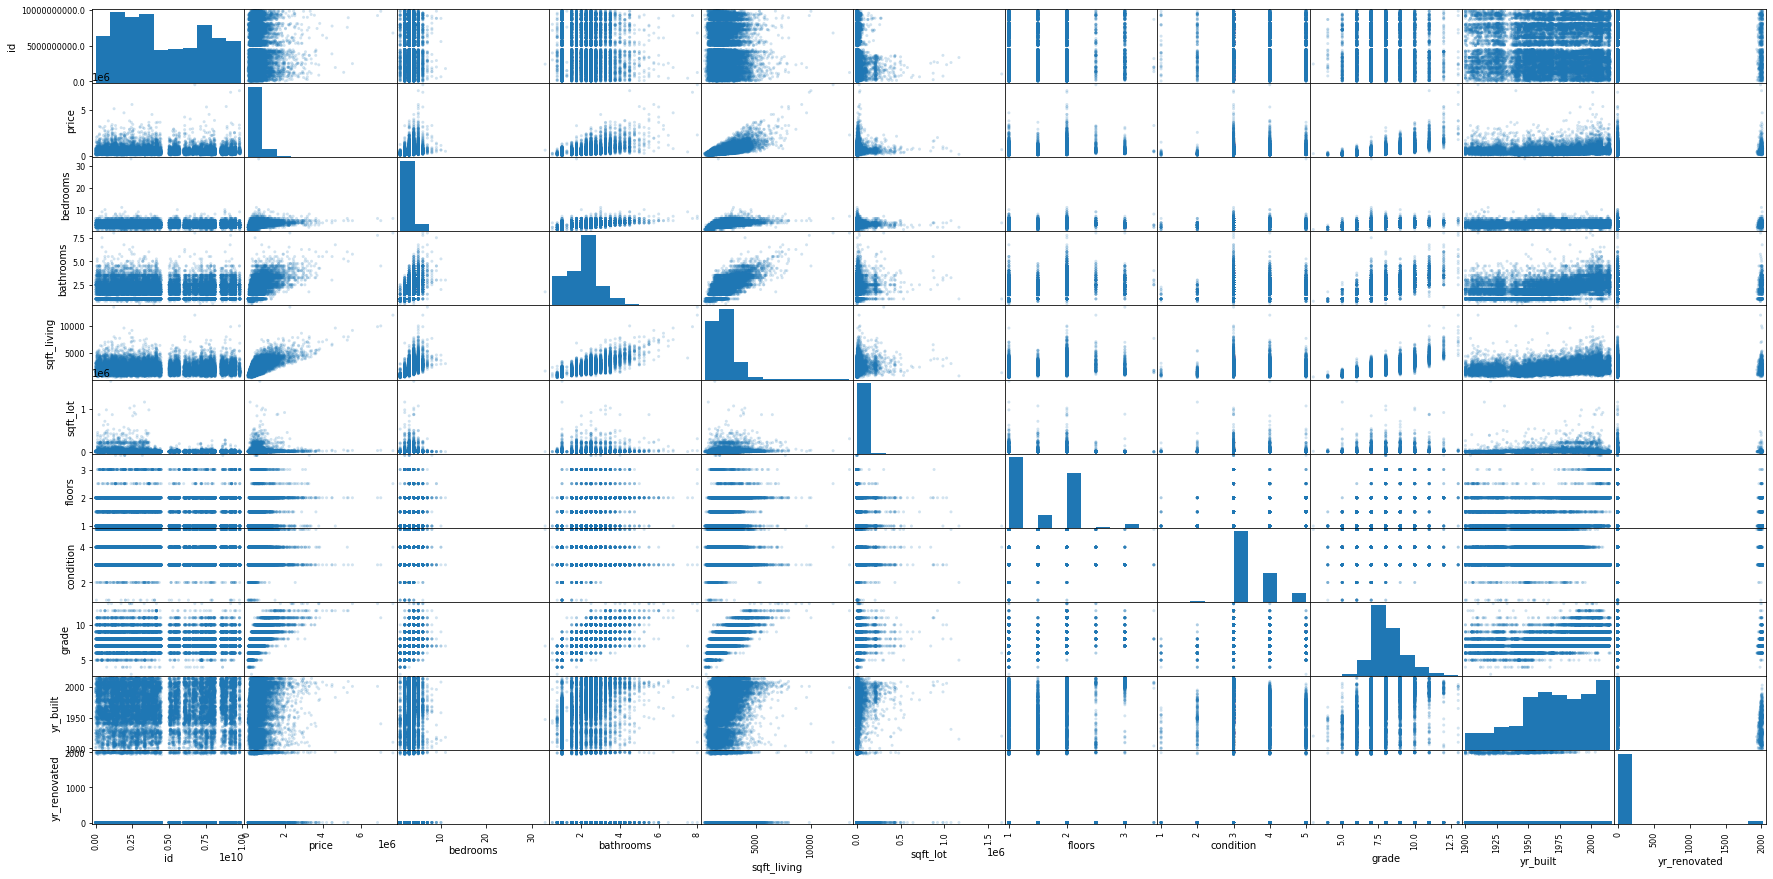

In [57]:
#multicollinearity of predictor variables
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(30,15));